**B1: Tạo dữ liệu**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import glob
import cv2
import numpy as np

x_train = []
x_test = []
y_train = []
y_test = []

for train in glob.glob("/content/drive/MyDrive/3FacesWithCNN/train/*.bmp"):
  a = cv2.imread(train)
  x_train.append(a)
  train0 = 'Phat'
  train1 = 'Tu'
  train2 = 'Thang'
  train3 = '00'
  if train0 in train:
    y_train.append([0])
  elif train1 in train:
    y_train.append([1])
  elif train2 in train:
    y_train.append([2])
  elif train3 in train:
    y_train.append([3])
x_train = np.array(x_train)
y_train = np.array(y_train)

for test in glob.glob("/content/drive/MyDrive/3FacesWithCNN/test/*.bmp"):
  b = cv2.imread(test)
  x_test.append(b)
  test0 = 'Phat'
  test1 = 'Tu'
  test2 = 'Thang'
  test3 = '00'
  if test0 in test:
    y_test.append([0])
  elif test1 in test:
    y_test.append([1])
  elif test2 in test:
    y_test.append([2])
  elif test3 in test:
    y_test.append([3])
x_test = np.array(x_test)
y_test = np.array(y_test)

In [3]:
print(y_train)
print(y_test)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]


**Test show ảnh train và y_train**

[2]


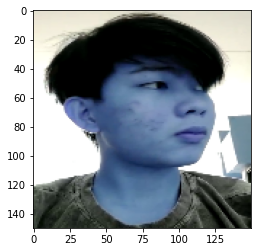

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_test[4])
print(y_test[4])

In [7]:
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(x_test.shape)

(404, 150, 150, 3)
(404, 1)
(9, 1)
(9, 150, 150, 3)


**B2: Chuẩn hoá dữ liệu**

In [8]:
from keras.utils.np_utils import to_categorical

x_train = x_train.reshape(404, 150,150,3)
x_test = x_test.reshape(9, 150,150,3)
# Chuyen don vi mau thanh so thuc
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Chuyen anh trang den
x_train /= 255
x_test /= 255

# ...to_categorical(y_train, 4) với 4: số phần tử output
y_train = to_categorical(y_train, 4)
y_test = to_categorical(y_test, 4)

In [9]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models                 import Sequential
from keras.layers                 import Dense, Activation, BatchNormalization, Dropout, LSTM
from tensorflow.keras.optimizers  import RMSprop, SGD
from keras.layers                 import Conv2D
from keras.layers                 import MaxPooling2D
from keras.layers                 import Flatten
from keras.callbacks              import EarlyStopping 

model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same',input_shape = (150,150,3,)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)      0

In [10]:
opt=SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=64,epochs=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


7/7 [==============================] - 22s 3s/step - loss: 3.5693 - accuracy: 0.4183 - val_loss: 1.4464 - val_accuracy: 0.4444
Epoch 2/10
7/7 [==============================] - 22s 3s/step - loss: 1.0387 - accuracy: 0.5396 - val_loss: 0.9701 - val_accuracy: 0.6667
Epoch 3/10
7/7 [==============================] - 18s 2s/step - loss: 0.6497 - accuracy: 0.7401 - val_loss: 0.8313 - val_accuracy: 0.6667
Epoch 4/10
7/7 [==============================] - 17s 2s/step - loss: 1.2628 - accuracy: 0.6510 - val_loss: 1.0514 - val_accuracy: 0.6667
Epoch 5/10
7/7 [==============================] - 17s 2s/step - loss: 0.7416 - accuracy: 0.7649 - val_loss: 0.5251 - val_accuracy: 0.7778
Epoch 6/10
7/7 [==============================] - 17s 2s/step - loss: 0.4292 - accuracy: 0.7995 - val_loss: 0.1265 - val_accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 17s 2s/step - loss: 0.0766 - accuracy: 0.9975 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 8/10
7/7 [=============================

In [11]:
model.save('/content/drive/MyDrive/3FacesWithCNN/3FaceswithCNN.h5')

**Đọc ảnh custom**

(150, 150, 3)


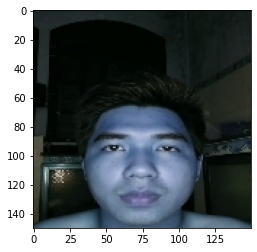

In [12]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(r'/content/drive/MyDrive/3FacesWithCNN/test/Phat_0210.bmp')
plt.imshow(img)
img_re = cv2.resize(img, (150, 150))
plt.imshow(img_re)
print(img_re.shape)

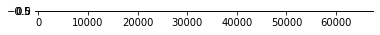

In [13]:
x_test_c = img_re.reshape(-1, 67500) 
x_test_c = x_test_c.astype('float32')
x_test_c /= 255
plt.imshow(x_test_c)

**Tiên đoán**

In [14]:
y_pred = model.predict(x_test)
print(y_pred)

[[9.9999976e-01 7.1163178e-08 9.1909328e-08 1.4490366e-15]
 [9.9997628e-01 1.9191853e-05 4.5885467e-06 4.1371823e-14]
 [9.9999678e-01 3.2129274e-06 1.9444188e-08 2.3497366e-09]
 [9.9929929e-01 7.0073915e-04 2.9556709e-08 3.6844920e-09]
 [5.9534477e-07 2.2150000e-09 9.9999940e-01 2.5678659e-10]
 [1.0023519e-09 1.0000000e+00 1.5781160e-12 7.7333794e-18]
 [1.6680368e-06 1.9979115e-08 3.5776694e-08 9.9999833e-01]
 [2.1704934e-10 9.9109967e-13 1.8538594e-11 1.0000000e+00]
 [6.5722094e-07 1.2668439e-09 1.6818510e-07 9.9999917e-01]]


In [16]:
score = model.evaluate(x_test, y_pred, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0006859283312223852
Test accuracy: 1.0


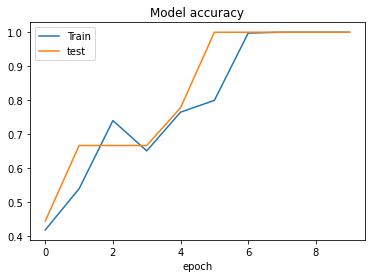

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'test'], loc='upper left')
plt.show()

In [19]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

img = load_img('/content/drive/MyDrive/3FacesWithCNN/test/Tu_0274.bmp', target_size=(150, 150))
img = img_to_array(img)
img = img.reshape(1, 150,150,3)
img = img.astype('float32')
img = img / 255.0


# load model
model_final = load_model('/content/drive/MyDrive/3FacesWithCNN/3FaceswithCNN.h5')
# predict the class
result = model.predict(img)
print('Giá trị dự đoán:', np.argmax(result))
if np.argmax(result) == 0:
   print("Tấn Phát")
elif np.argmax(result) == 1:
  print("Đình Tú")
elif np.argmax(result) == 2:
  print("Quốc Thắng")
elif np.argmax(result) == 3:
  print("Không có ai trong nhóm")
plt.show()

Giá trị dự đoán: 1
Đình Tú
